In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml
data=fetch_openml(data_id=1480, as_frame=True, parser='auto')
df=data.frame
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df=df.rename(columns={
    'V1':'Age',
    'V2':'Gender',
    'V3':'Total_Bilirun',
    'V4':'Direct_Bilirubin',
    'V5':'Alkphos',
    'V6':'Sgpt',
    'V7':'Sgot',
    'V8':'Total_Proteins',
    'V9':'Albumin',
    'V10':'A/G'
    })
df.head()

,Age,Gender,Total_Bilirun,Direct_Bilirubin,Alkphos,Sgpt,Sgot,Total_Proteins,Albumin,A/G,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull().sum()

Age                 0
Gender              0
Total_Bilirun       0
Direct_Bilirubin    0
Alkphos             0
Sgpt                0
Sgot                0
Total_Proteins      0
Albumin             0
A/G                 0
Class               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(13)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,570.0,NaN,NaN,NaN,44.849123,16.242182,4.0,33.0,45.0,58.0,90.0
Gender,570,2,Male,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirun,570.0,NaN,NaN,NaN,3.321754,6.267941,0.4,0.8,1.0,2.6,75.0
Direct_Bilirubin,570.0,NaN,NaN,NaN,1.497544,2.833231,0.1,0.2,0.3,1.3,19.7
Alkphos,570.0,NaN,NaN,NaN,291.750877,245.291859,63.0,176.0,208.0,298.0,2110.0
Sgpt,570.0,NaN,NaN,NaN,79.72807,181.471697,10.0,23.0,35.0,60.0,2000.0
Sgot,570.0,NaN,NaN,NaN,109.380702,290.880671,10.0,25.0,41.0,86.75,4929.0
Total_Proteins,570.0,NaN,NaN,NaN,6.496316,1.0883,2.7,5.8,6.6,7.2,9.6
Albumin,570.0,NaN,NaN,NaN,3.148947,0.796813,0.9,2.6,3.1,3.8,5.5
A/G,570.0,NaN,NaN,NaN,0.947997,0.31851,0.3,0.7,0.947064,1.1,2.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               570 non-null    int64   
 1   Gender            570 non-null    category
 2   Total_Bilirun     570 non-null    float64 
 3   Direct_Bilirubin  570 non-null    float64 
 4   Alkphos           570 non-null    int64   
 5   Sgpt              570 non-null    int64   
 6   Sgot              570 non-null    int64   
 7   Total_Proteins    570 non-null    float64 
 8   Albumin           570 non-null    float64 
 9   A/G               570 non-null    float64 
 10  Class             570 non-null    category
dtypes: category(2), float64(5), int64(4)
memory usage: 45.9 KB


In [9]:
df['Gender'].value_counts()

Gender
Male      430
Female    140
Name: count, dtype: int64

In [10]:
df['Class'].value_counts()

Class
1    406
2    164
Name: count, dtype: int64

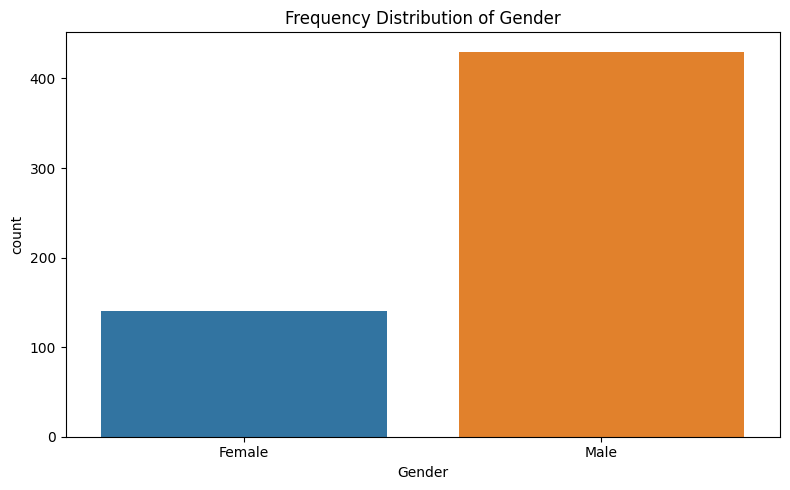

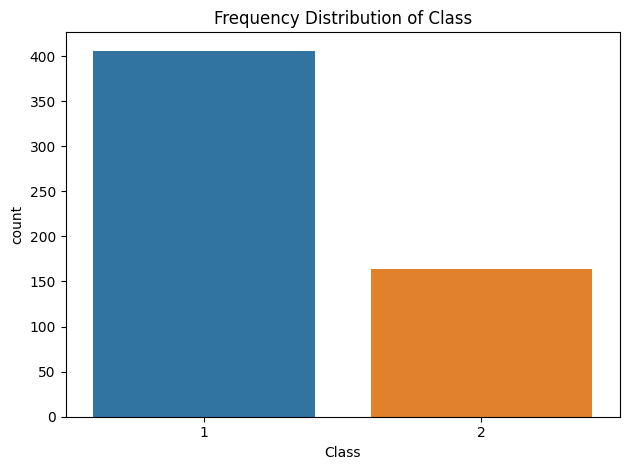

In [11]:
plt.figure(figsize=(8,5))
for col in ['Gender', 'Class']:
    sns.countplot(df, x=col, hue=col)
    plt.title(f'Frequency Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [12]:
df.groupby('Gender')['Class'].value_counts()

Gender  Class
Female  1         91
        2         49
Male    1        315
        2        115
Name: count, dtype: int64

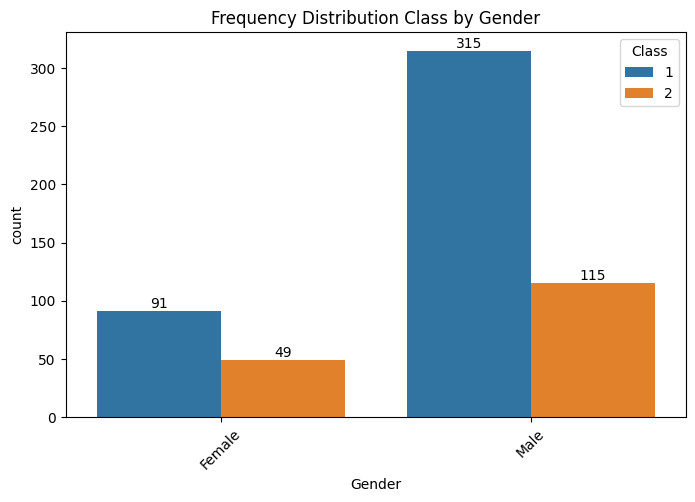

In [13]:
plt.figure(figsize=(8,5))
ax=sns.countplot(df, x='Gender', hue='Class')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Frequency Distribution Class by Gender')
    plt.xticks(rotation=45)
plt.show()

In [14]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

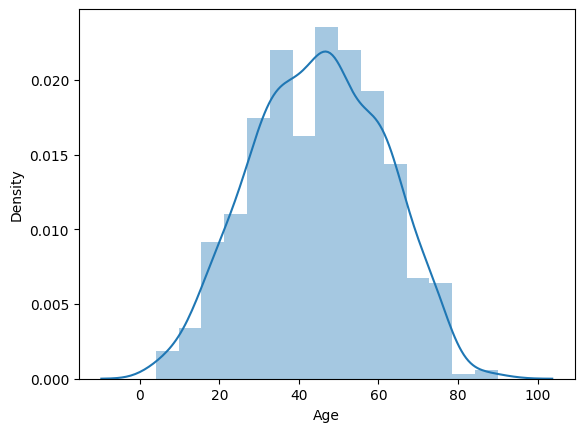

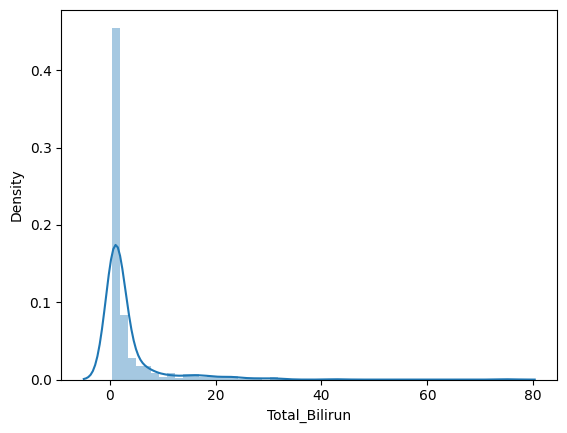

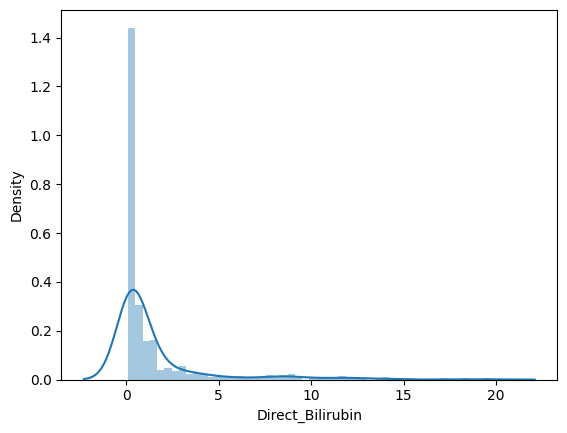

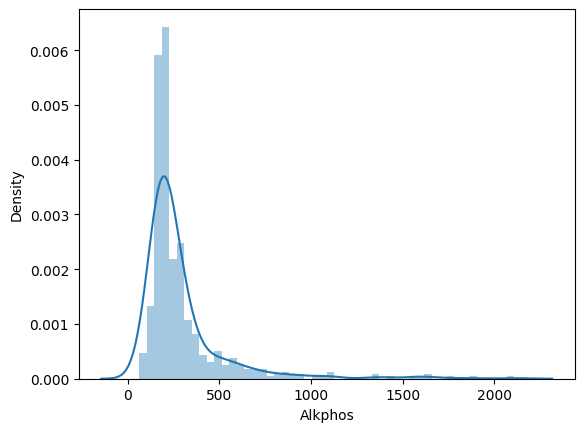

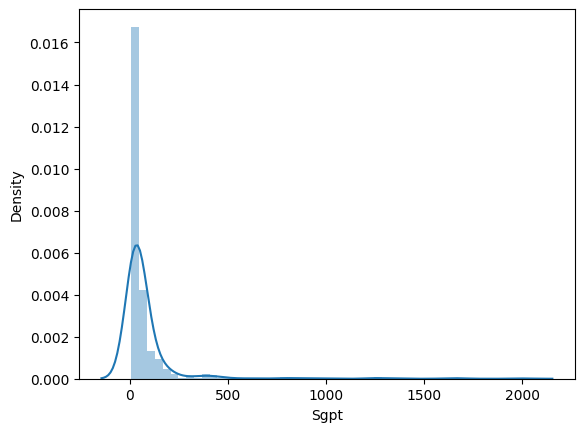

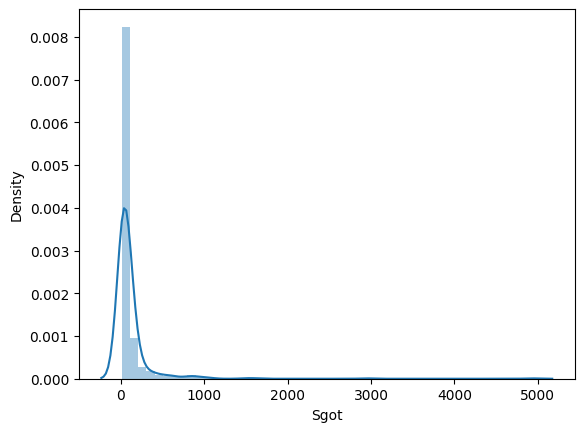

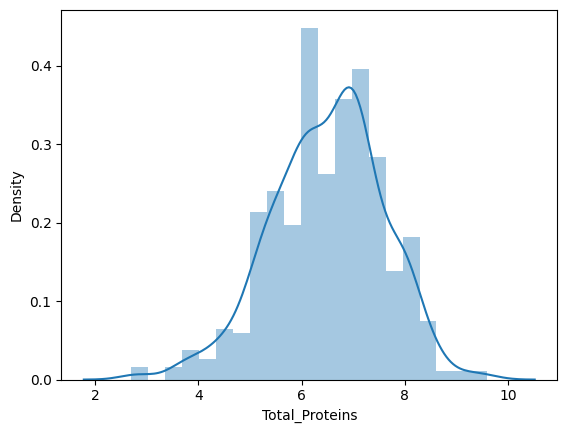

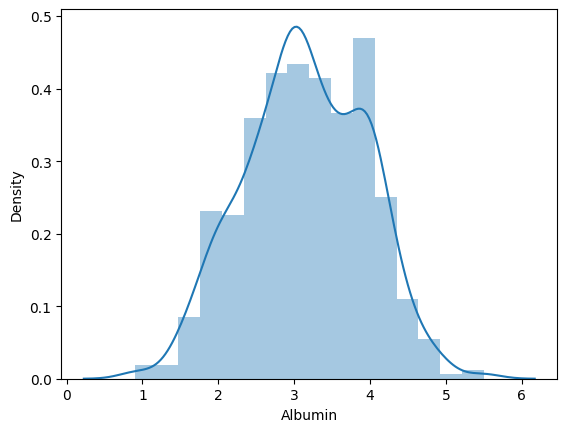

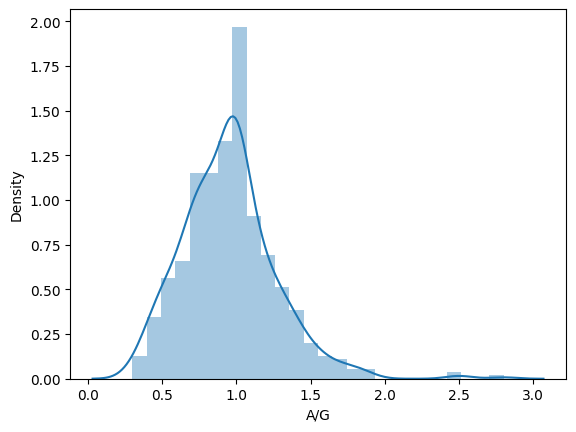

In [15]:
for i in list(df.select_dtypes(exclude=['category']).columns):
    distplots(i)

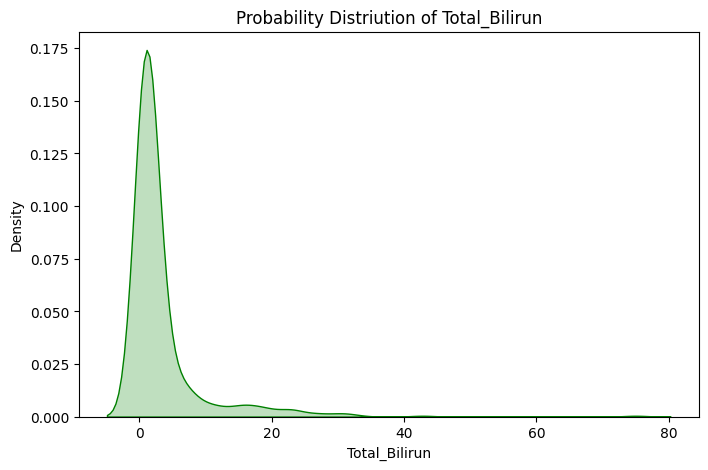

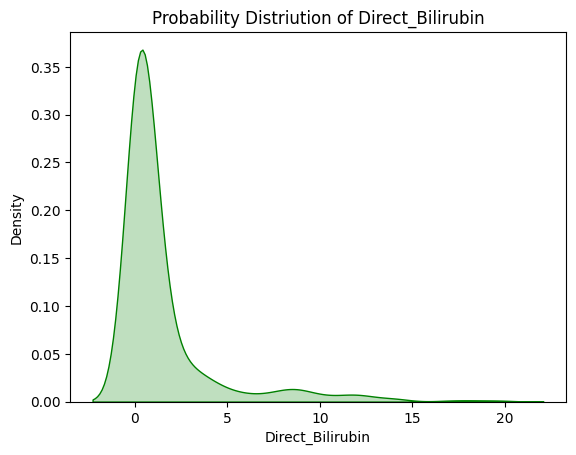

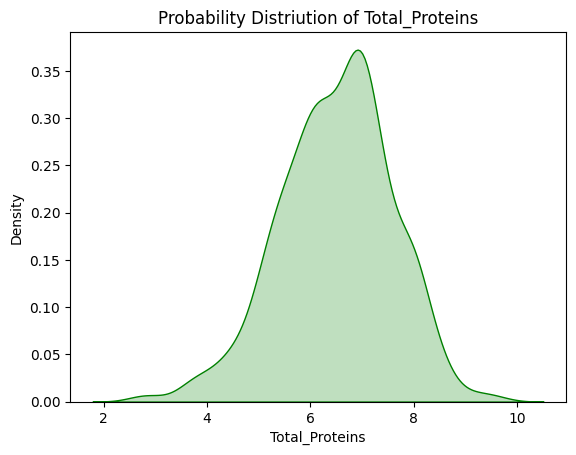

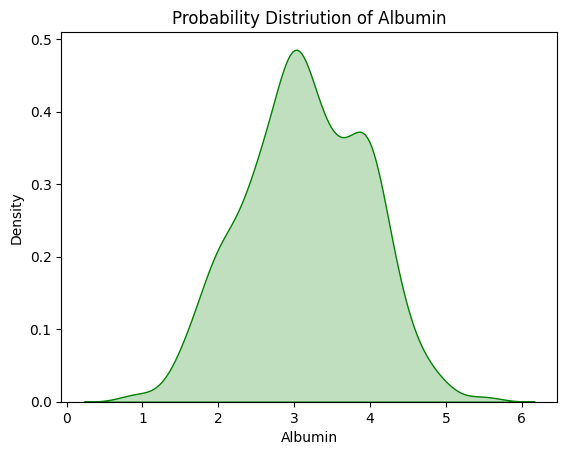

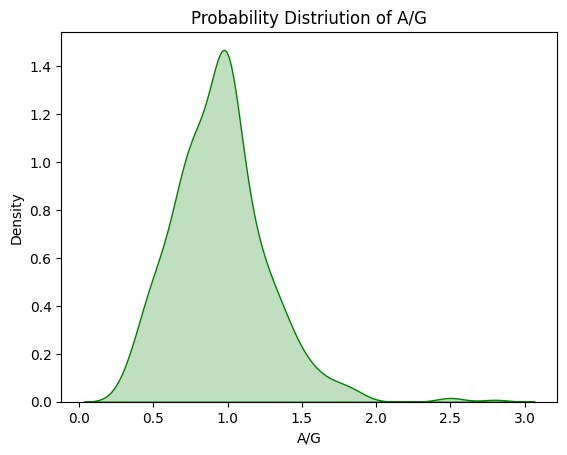

In [16]:
plt.figure(figsize=(8,5))
for col in ['Total_Bilirun','Direct_Bilirubin','Total_Proteins','Albumin','A/G']:
    sns.kdeplot(df[col], fill=True, color='green')
    plt.title(f'Probability Distriution of {col}')
    plt.show()

In [17]:
encode=pd.get_dummies(df['Gender'], drop_first=True, dtype=int)
df_encode=pd.concat([df, encode], axis=1)
df_encode=df_encode.drop('Gender', axis=1)
df_encode.head()

,Age,Total_Bilirun,Direct_Bilirubin,Alkphos,Sgpt,Sgot,Total_Proteins,Albumin,A/G,Class,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


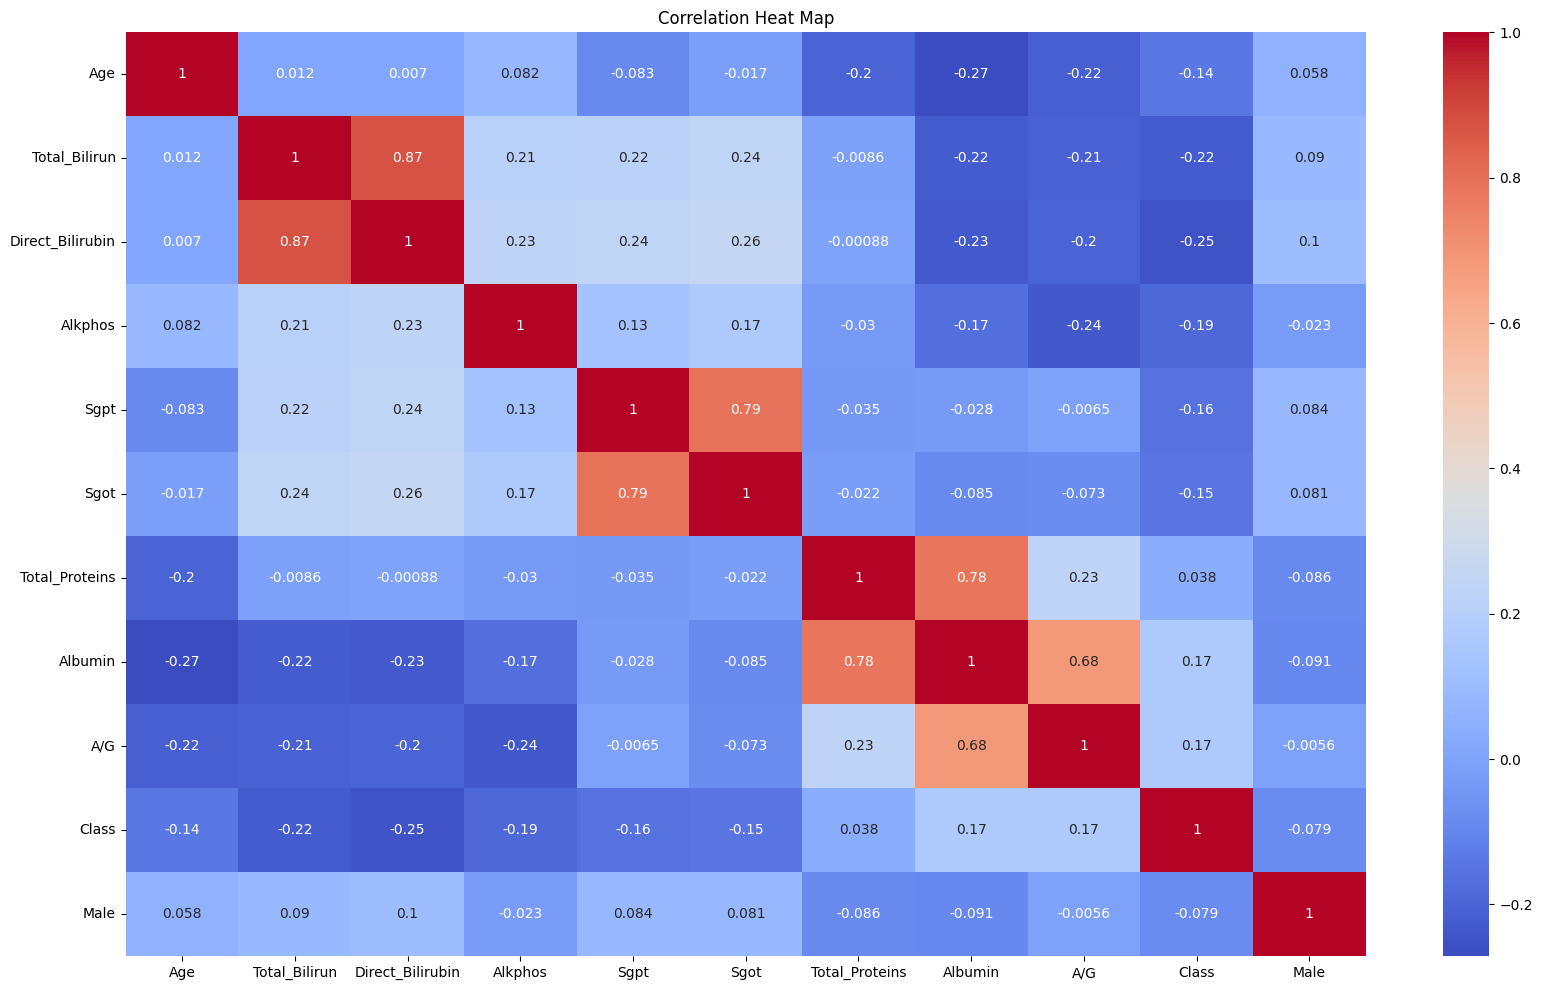

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df_encode.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

In [19]:
x=df_encode.drop('Class', axis=1)
y=df_encode['Class']

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=3)

In [22]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x_train=sca.fit_transform(x_train)
x_test=sca.fit_transform(x_test)

In [23]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))


Before SMOTE: Counter({'1': 286, '2': 113})
After SMOTE: Counter({'1': 286, '2': 286})


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_smote, y_train_smote)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred_train = model.predict(x_train_smote)
y_pred_test = model.predict(x_test)

In [26]:
print(classification_report(y_train_smote, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.77      0.62      0.69       286
           2       0.68      0.81      0.74       286

    accuracy                           0.72       572
   macro avg       0.72      0.72      0.71       572
weighted avg       0.72      0.72      0.71       572


              precision    recall  f1-score   support

           1       0.86      0.57      0.69       120
           2       0.44      0.78      0.56        51

    accuracy                           0.64       171
   macro avg       0.65      0.68      0.63       171
weighted avg       0.74      0.64      0.65       171



In [27]:
print(confusion_matrix(y_train_smote, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[178 108]
 [ 54 232]]

[[69 51]
 [11 40]]


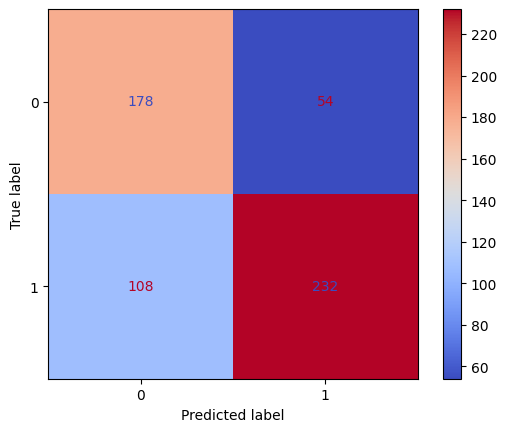

In [28]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_pred_train, y_train_smote))
c_matrix.plot(cmap='coolwarm')

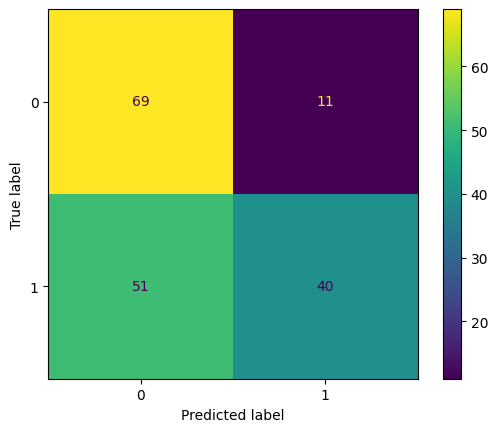

In [29]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test))
c_matrix.plot(cmap='viridis')

In [30]:
#Imports
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

#Define Parameter Distributions for Logistic Regression
param_dist = {
    'C': loguniform(1e-4, 1e2),   # Regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],          # Supports both l1 & l2
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,                 # 20–50 is usually enough
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegre...max_iter=1000)
,param_distributions,"{'C': <scipy.stats....001B895D98050>, 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['saga']}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [31]:
#Best Parameters & CV Scores
print('Best Parameters:', random_search.best_params_)
print('Best CV F1 Score:', random_search.best_score_)


Best Parameters: {'C': np.float64(0.006724850206557251), 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Best CV F1 Score: 0.7083593267135366


In [32]:
#Train & Evaluate Tuned Model
best_log_reg = random_search.best_estimator_

y_pred = best_log_reg.predict(x_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.81      0.59      0.68       120
           2       0.41      0.67      0.51        51

    accuracy                           0.61       171
   macro avg       0.61      0.63      0.60       171
weighted avg       0.69      0.61      0.63       171

[[71 49]
 [17 34]]


In [33]:
from sklearn.svm import SVC
s2=SVC(kernel='linear')
s2.fit(x_train_smote, y_train_smote)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
yhat_train_s2=s2.predict(x_train_smote)
yhat_test_s2=s2.predict(x_test)

In [35]:
print(classification_report(y_train_smote, yhat_train_s2))
print()
print(classification_report(y_test, yhat_test_s2))

              precision    recall  f1-score   support

           1       0.83      0.53      0.65       286
           2       0.65      0.90      0.76       286

    accuracy                           0.71       572
   macro avg       0.74      0.71      0.70       572
weighted avg       0.74      0.71      0.70       572


              precision    recall  f1-score   support

           1       0.92      0.47      0.63       120
           2       0.42      0.90      0.57        51

    accuracy                           0.60       171
   macro avg       0.67      0.69      0.60       171
weighted avg       0.77      0.60      0.61       171



In [36]:
print(confusion_matrix(y_train_smote, yhat_train_s2))
print()
print(confusion_matrix(y_test, yhat_test_s2))

[[151 135]
 [ 30 256]]

[[57 63]
 [ 5 46]]


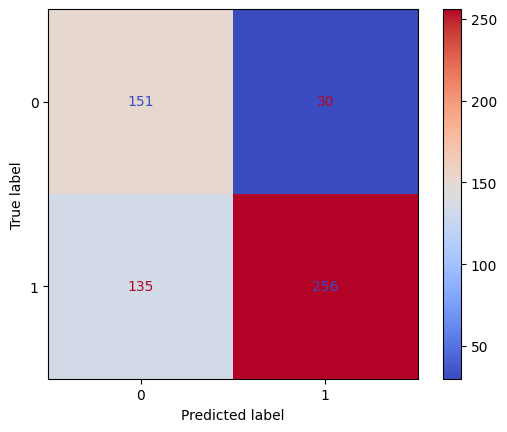

In [37]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_s2, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

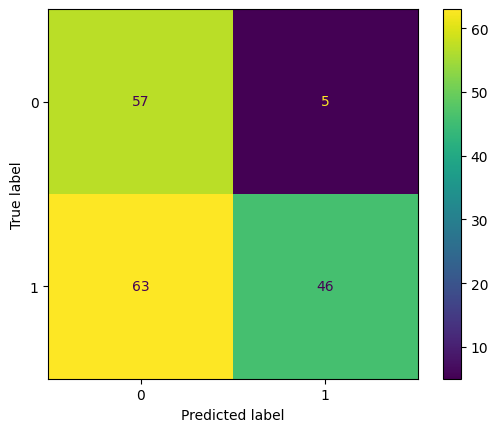

In [38]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_s2, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [39]:
#Define Parameter Distributions for SVC
param_dist = {
    'C': loguniform(1e-3, 1e3),      # Regularization strength
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=s2,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,SVC(kernel='linear')
,param_distributions,"{'C': <scipy.stats....001B8919A4410>, 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [40]:
#Best Parameters & CV Score
print("Best Parameters:", random_search.best_params_)
print("Best CV F1 Score:", random_search.best_score_)


Best Parameters: {'C': np.float64(793.2047656808546), 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1 Score: 0.7797877787089285


In [41]:
#Train & Evaluate Tuned Model
best_svc = random_search.best_estimator_

y_pred = best_svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.71      0.77      0.74       120
           2       0.32      0.25      0.28        51

    accuracy                           0.61       171
   macro avg       0.51      0.51      0.51       171
weighted avg       0.59      0.61      0.60       171

[[92 28]
 [38 13]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_smote, y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
yhat_train_rfc=rfc.predict(x_train_smote)
yhat_test_rfc=rfc.predict(x_test)

In [44]:
print(classification_report(y_train_smote, yhat_train_rfc))
print()
print(classification_report(y_test, yhat_test_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       286
           2       1.00      1.00      1.00       286

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572


              precision    recall  f1-score   support

           1       0.77      0.79      0.78       120
           2       0.48      0.45      0.46        51

    accuracy                           0.69       171
   macro avg       0.63      0.62      0.62       171
weighted avg       0.68      0.69      0.69       171



In [45]:
print(confusion_matrix(y_train_smote, yhat_train_rfc))
print()
print(confusion_matrix(y_test, yhat_test_rfc))

[[286   0]
 [  0 286]]

[[95 25]
 [28 23]]


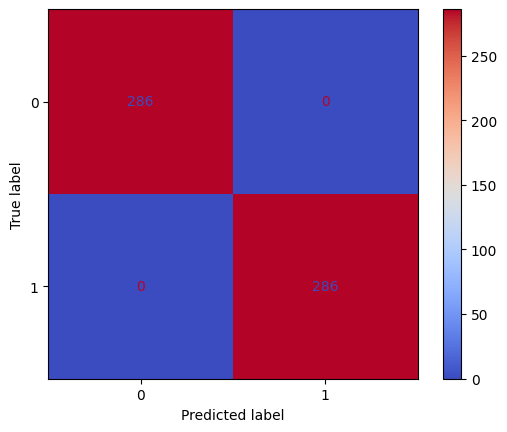

In [46]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_rfc, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

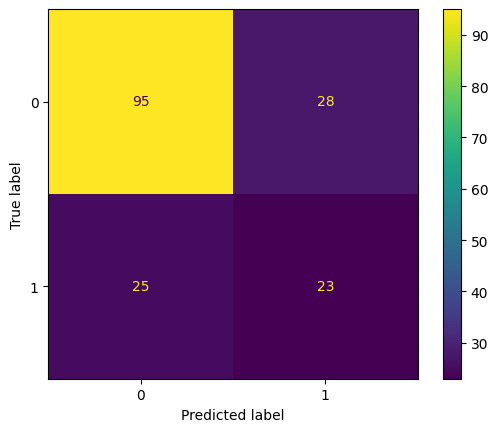

In [47]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_rfc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [48]:
#Define Parameter Distributions for RandomForestClassifier
param_dist = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,25
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [49]:
#Best Parameters & CV Score
print('Best Parameters:', grid_search.best_params_)
print('Best CV Score:', grid_search.best_score_)

Best Parameters: {'n_estimators': np.int64(400), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best CV Score: 0.8317758929225638


In [50]:
#Train & Evaluate Tuned Model
best_rfc = grid_search.best_estimator_

y_pred = best_rfc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.78      0.87      0.82       120
           2       0.58      0.43      0.49        51

    accuracy                           0.74       171
   macro avg       0.68      0.65      0.66       171
weighted avg       0.72      0.74      0.72       171

[[104  16]
 [ 29  22]]


In [ ]:
# Liver Patient Classification Analysis Documentation

**Dataset:** Liver Patients Dataset (OpenML – Data ID 1480)

---

## 1. Introduction

This project presents an end-to-end data science workflow for analyzing liver patient data and building machine learning models to classify patients based on clinical and biochemical indicators. The primary objective is to predict liver disease status while addressing class imbalance and evaluating multiple classification algorithms.

The analysis covers data loading, cleaning, exploratory data analysis (EDA), feature engineering, class balancing using SMOTE, model training, evaluation, and hyperparameter tuning.

---

## 2. Data Source and Description

The dataset was obtained from **OpenML (Data ID: 1480)** and contains patient demographic and laboratory test results related to liver function.

### 2.1 Target Variable

* **Class**:

  * `1` – Liver patient
  * `2` – Non-liver patient

### 2.2 Feature Description

* **Age** – Patient age (years)
* **Gender** – Male or Female
* **Total_Bilirubin** – Total bilirubin level
* **Direct_Bilirubin** – Direct bilirubin level
* **Alkphos** – Alkaline phosphotase
* **Sgpt** – Alanine aminotransferase (ALT)
* **Sgot** – Aspartate aminotransferase (AST)
* **Total_Proteins** – Total proteins
* **Albumin** – Albumin level
* **A/G** – Albumin/Globulin ratio

---

## 3. Data Preprocessing

### 3.1 Column Renaming

The original variable names (V1–V10) were renamed to meaningful clinical names to improve interpretability.

### 3.2 Missing Values

A completeness check confirmed that **no missing values** exist across all variables.

### 3.3 Duplicate Handling

* Detected **13 duplicate records**
* Duplicates were removed to ensure data integrity

### 3.4 Data Types

* Numerical features: `int64`, `float64`
* Categorical features: `Gender`, `Class`

---

## 4. Exploratory Data Analysis (EDA)

### 4.1 Descriptive Statistics

* Average patient age: ~45 years
* Majority of patients are **Male (430)** compared to **Female (140)**
* Target variable is **imbalanced**:

  * Class 1: 406 observations
  * Class 2: 164 observations

### 4.2 Categorical Analysis

* Gender-wise distribution revealed a higher prevalence of liver patients among males
* Count plots illustrated imbalance in both **Gender** and **Class**

### 4.3 Distribution Analysis

* Histograms and KDE plots showed **right-skewed distributions** for liver enzyme variables such as `Sgpt`, `Sgot`, and `Alkphos`
* Protein-related variables showed more symmetric distributions

### 4.4 Correlation Analysis

A correlation heatmap highlighted:

* Strong relationships between `Total_Bilirubin` and `Direct_Bilirubin`
* Moderate correlations among liver enzyme indicators

---

## 5. Feature Engineering

### 5.1 Encoding

* **Gender** was encoded using one-hot encoding (`Male = 1`, `Female = 0`)
* The original categorical column was dropped after encoding

### 5.2 Feature–Target Split

* **X:** All predictor variables
* **y:** Class

### 5.3 Train-Test Split

* 70% Training set
* 30% Testing set
* Random state fixed for reproducibility

### 5.4 Feature Scaling

* Standardization applied using **StandardScaler** to normalize numerical features

---

## 6. Handling Class Imbalance

To address class imbalance in the training data:

* **SMOTE (Synthetic Minority Oversampling Technique)** was applied
* Class distribution before SMOTE:

  * Class 1: 286
  * Class 2: 113
* After SMOTE:

  * Class 1: 286
  * Class 2: 286

This ensured fair learning for minority classes.

---

## 7. Model Development and Evaluation

Multiple classification models were trained and evaluated using precision, recall, F1-score, accuracy, and confusion matrices.

---

### 7.1 Logistic Regression

**Baseline Performance (Test Set):**

* Accuracy: ~64%
* Stronger performance on Class 1 than Class 2

#### Hyperparameter Tuning

* Used **RandomizedSearchCV**
* Tuned parameters: `C`, `penalty`, `class_weight`

**Best CV F1 Score:** ~0.71

**Tuned Model Test Accuracy:** ~61%

---

### 7.2 Support Vector Classifier (SVC)

#### Linear Kernel

* Good recall for minority class
* Moderate overall accuracy (~60%)

#### Tuned SVC (RBF Kernel)

* Best CV F1 Score: ~0.78
* Improved decision boundary
* Still struggled with minority class precision

---

### 7.3 Random Forest Classifier

#### Baseline Model

* Perfect training accuracy (overfitting observed)
* Test accuracy: ~69%

#### Tuned Random Forest

* Hyperparameters tuned using RandomizedSearchCV
* Best CV F1 Score: ~0.83

**Final Test Performance:**

* Accuracy: ~74%
* Best overall balance between bias and variance
* Superior class separation compared to linear models

---

## 8. Model Comparison Summary

| Model                 | Test Accuracy | Strengths                | Limitations                 |
| --------------------- | ------------- | ------------------------ | --------------------------- |
| Logistic Regression   | ~61–64%       | Interpretable            | Lower minority recall       |
| SVC (Tuned)           | ~61%          | Non-linear learning      | Class imbalance sensitivity |
| Random Forest (Tuned) | ~74%          | Best overall performance | Less interpretable          |

---

## 9. Conclusions

* Class imbalance significantly impacted initial model performance
* SMOTE improved recall for minority class across all models
* Tree-based models (Random Forest) outperformed linear classifiers
* Hyperparameter tuning substantially improved generalization

---


